In [79]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(3000)

# Constants
howMany = 10
weeks = 11 # given the firts week is zero
daily_speed_growth_rate = 0.05  # 5% improvement per week
daily_comprehension_growth_rate = 0.03  # 3% improvement per week
sporadic_speed_growth_rate = 0.02  # 2% improvement per week
sporadic_comprehension_growth_rate = 0.01  # 1% improvement per week
# weeks_range = list(range(1, weeks + 1)) # this will be our x

In [80]:
# Have dataframes for improvements from first week to last both in daily and sporadic
daily_weeklyImprovementsSpeed_df = pd.DataFrame()
daily_weeklyImprovementsComprehension_df = pd.DataFrame()
sporadic_weeklyImprovementsSpeed_df = pd.DataFrame()
sporadic_weeklyImprovementsComprehension_df = pd.DataFrame()


daily_weeklyImprovementsSpeed_df['habit'] = np.full(howMany * 6, "Daily")
daily_weeklyImprovementsComprehension_df['habit'] = np.full(60, "Daily")
sporadic_weeklyImprovementsSpeed_df['habit'] = np.full(60, "Sporadic")
sporadic_weeklyImprovementsComprehension_df['habit'] = np.full(60, "Sporadic")


# Dataframe that has the daily and sporadic data
sporadicDf = pd.DataFrame()
dailyDf = pd.DataFrame()
frustrationInit = ["Frustration I", "Frustration II", "Frustration III",\
                   "Frustration IV", "Frustration V", "Frustration VI"] * howMany


# Lists that will contain the data for daily and sporadic dataframes
daily_wpmInit = []
daily_testInit = []
daily_frustrationFinal = []
sporadic_wpmInit = []
sporadic_testInit = []
sporadic_frustrationFinal = []

for i in frustrationInit:
    if (i == "Frustration I"): 
        daily_wpmInit.append(np.random.randint(25, 31))
        daily_testInit.append(round(np.random.uniform(0.01, 0.75), 2))
        sporadic_wpmInit.append(np.random.randint(25, 31))
        sporadic_testInit.append(round(np.random.uniform(0.01, 0.75), 2))
    elif (i == "Frustration II"):
        daily_wpmInit.append(np.random.randint(31, 61))
        daily_testInit.append(round(np.random.uniform(0.01, 0.75), 2))
        sporadic_wpmInit.append(np.random.randint(31, 61))
        sporadic_testInit.append(round(np.random.uniform(0.01, 0.75), 2))
    elif (i == "Frustration III"):
        daily_wpmInit.append(np.random.randint(61, 91))
        daily_testInit.append(round(np.random.uniform(0.01, 0.75), 2))
        sporadic_wpmInit.append(np.random.randint(61, 91))
        sporadic_testInit.append(round(np.random.uniform(0.01, 0.75), 2))
    elif (i == "Frustration IV"):
        daily_wpmInit.append(np.random.randint(91, 111))
        daily_testInit.append(round(np.random.uniform(0.01, 0.75), 2))
        sporadic_wpmInit.append(np.random.randint(91, 111))
        sporadic_testInit.append(round(np.random.uniform(0.01, 0.75), 2))
    elif (i == "Frustration V"):
        daily_wpmInit.append(np.random.randint(111, 141))
        daily_testInit.append(round(np.random.uniform(0.01, 0.75), 2))
        sporadic_wpmInit.append(np.random.randint(111, 141))
        sporadic_testInit.append(round(np.random.uniform(0.01, 0.75), 2))
    else:
        daily_wpmInit.append(np.random.randint(141, 161))
        daily_testInit.append(round(np.random.uniform(0.01, 0.75), 2))
        sporadic_wpmInit.append(np.random.randint(141, 161))
        sporadic_testInit.append(round(np.random.uniform(0.01, 0.75), 2))

dailyDf['habit'] = np.full(len(frustrationInit), "Daily")
dailyDf['initial_wpm'] = daily_wpmInit
dailyDf['initial_score'] = daily_testInit
dailyDf['initial_reading_lvl'] = frustrationInit

sporadicDf['habit'] = np.full(len(frustrationInit), "Sporadic")
sporadicDf['initial_wpm'] = sporadic_wpmInit
sporadicDf['initial_score'] = sporadic_testInit
sporadicDf['initial_reading_lvl'] = frustrationInit

# This is just to store the mean of the improvments each week for graphing
daily_speed_improvements = []
daily_comprehension_improvements = []
sporadic_speed_improvements = []
sporadic_comprehension_improvements = []


for week in range(weeks):
    daily_weeklyImprovementsSpeed_df["Week_" + str(week)] = (dailyDf['initial_wpm'] * (1 + daily_speed_growth_rate * week)).clip(upper=250)
    daily_speed_improvements.append(daily_weeklyImprovementsSpeed_df["Week_" + str(week)].mean()) # this will be our y
    
    daily_weeklyImprovementsComprehension_df["Week_" + str(week)] = (dailyDf['initial_score'] * (1 + daily_comprehension_growth_rate * week)).clip(upper=1)
    daily_comprehension_improvements.append(daily_weeklyImprovementsComprehension_df["Week_" + str(week)].mean()) # this will be our y

    sporadic_weeklyImprovementsSpeed_df["Week_" + str(week)] = (sporadicDf['initial_wpm'] * (1 + sporadic_speed_growth_rate * week)).clip(upper=250)
    sporadic_speed_improvements.append(sporadic_weeklyImprovementsSpeed_df["Week_" + str(week)].mean()) # this will be our y
    
    sporadic_weeklyImprovementsComprehension_df["Week_" + str(week)] = (sporadicDf['initial_score'] * (1 + sporadic_comprehension_growth_rate * week)).clip(upper=1)
    sporadic_comprehension_improvements.append(sporadic_weeklyImprovementsComprehension_df["Week_" + str(week)].mean())


# Getting the final improvement # must have a threshold
dailyDf['final_wpm'] = daily_weeklyImprovementsSpeed_df["Week_10"] 
dailyDf['final_score'] = daily_weeklyImprovementsComprehension_df["Week_10"] 
sporadicDf['final_wpm'] = sporadic_weeklyImprovementsSpeed_df["Week_10"] 
sporadicDf['final_score'] = sporadic_weeklyImprovementsComprehension_df["Week_10"] 

modsimDf = pd.concat([dailyDf, sporadicDf], axis=0)
modsimDf = modsimDf.reset_index(drop=True)
modsimDf

,habit,initial_wpm,initial_score,initial_reading_lvl,final_wpm,final_score
0,Daily,29,0.20,Frustration I,43.5,0.260
1,Daily,57,0.01,Frustration II,85.5,0.013
2,Daily,69,0.75,Frustration III,103.5,0.975
3,Daily,109,0.31,Frustration IV,163.5,0.403
4,Daily,122,0.09,Frustration V,183.0,0.117
...,...,...,...,...,...,...
115,Sporadic,38,0.72,Frustration II,45.6,0.792
116,Sporadic,87,0.51,Frustration III,104.4,0.561
117,Sporadic,96,0.05,Frustration IV,115.2,0.055
118,Sporadic,125,0.13,Frustration V,150.0,0.143


In [81]:
for i in range(len(modsimDf['final_score'])):  # Loop over the actual length of testFinal
    if modsimDf['final_score'][i] < 0.75:
            if modsimDf['final_wpm'][i] < 31:
                daily_frustrationFinal.append("Frustration I")
            elif 31 <= modsimDf['final_wpm'][i] < 61:
                daily_frustrationFinal.append("Frustration II")
            elif 61 <= modsimDf['final_wpm'][i] < 91:
                daily_frustrationFinal.append("Frustration III")
            elif 91 <= modsimDf['final_wpm'][i] < 111:
                daily_frustrationFinal.append("Frustration IV")
            elif 111 <= modsimDf['final_wpm'][i] < 141:
                daily_frustrationFinal.append("Frustration V")
            else:  # 141 <= modsimDf['final_wpm'][i] < 161
                daily_frustrationFinal.append("Frustration VI")
    
    elif 0.75 <= modsimDf['final_score'][i] <= 0.89:  # Ensure coverage for this range
            daily_frustrationFinal.append(
                np.random.choice([
                    "Instructional I", "Instructional II",
                    "Instructional III", "Instructional IV",
                    "Instructional V", "Instructional VI"
                ])
            )
        
    else:  # testFinal[i] > 0.89
            if 70 <= modsimDf['final_wpm'][i] < 100:
                daily_frustrationFinal.append("Independent I")
            elif 100 <= modsimDf['final_wpm'][i] < 120:
                daily_frustrationFinal.append("Independent II")
            elif 120 <= modsimDf['final_wpm'][i] < 140:
                daily_frustrationFinal.append("Independent III")
            elif 140 <= modsimDf['final_wpm'][i] < 170:
                daily_frustrationFinal.append("Independent IV")
            elif 170 <= modsimDf['final_wpm'][i] < 190:
                daily_frustrationFinal.append("Independent V")
            else:  # modsimDf['final_wpm'][i]
                daily_frustrationFinal.append("Independent VI")




modsimDf['final_reading_lvl'] = daily_frustrationFinal
modsimDf

,habit,initial_wpm,initial_score,initial_reading_lvl,final_wpm,final_score,final_reading_lvl
0,Daily,29,0.20,Frustration I,43.5,0.260,Frustration II
1,Daily,57,0.01,Frustration II,85.5,0.013,Frustration III
2,Daily,69,0.75,Frustration III,103.5,0.975,Independent II
3,Daily,109,0.31,Frustration IV,163.5,0.403,Frustration VI
4,Daily,122,0.09,Frustration V,183.0,0.117,Frustration VI
...,...,...,...,...,...,...,...
115,Sporadic,38,0.72,Frustration II,45.6,0.792,Instructional II
116,Sporadic,87,0.51,Frustration III,104.4,0.561,Frustration IV
117,Sporadic,96,0.05,Frustration IV,115.2,0.055,Frustration V
118,Sporadic,125,0.13,Frustration V,150.0,0.143,Frustration VI


In [82]:
modsimDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   habit                120 non-null    object 
 1   initial_wpm          120 non-null    int64  
 2   initial_score        120 non-null    float64
 3   initial_reading_lvl  120 non-null    object 
 4   final_wpm            120 non-null    float64
 5   final_score          120 non-null    float64
 6   final_reading_lvl    120 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 6.7+ KB


In [83]:
modsimDf.describe()

,initial_wpm,initial_score,final_wpm,final_score
count,120.000000,120.000000,120.000000,120.000000
mean,87.541667,0.351333,118.127500,0.420517
std,43.288731,0.212088,60.030244,0.253884
min,25.000000,0.010000,30.000000,0.011000
25%,45.000000,0.167500,64.275000,0.204750
50%,90.000000,0.340000,115.800000,0.416000
75%,124.250000,0.532500,165.375000,0.640000
max,160.000000,0.750000,240.000000,0.975000


# Descriptive stats for Daily

In [84]:
modsimDf[modsimDf['habit'] == 'Daily'].describe()

,initial_wpm,initial_score,final_wpm,final_score
count,60.000000,60.000000,60.000000,60.000000
mean,87.183333,0.340500,130.775000,0.442650
std,43.044121,0.201666,64.566181,0.262166
min,25.000000,0.010000,37.500000,0.013000
25%,45.750000,0.147500,68.625000,0.191750
50%,86.500000,0.335000,129.750000,0.435500
75%,122.000000,0.502500,183.000000,0.653250
max,160.000000,0.750000,240.000000,0.975000


# Descriptive stats for sporadic

In [85]:
modsimDf[modsimDf['habit'] == 'Sporadic'].describe()

,initial_wpm,initial_score,final_wpm,final_score
count,60.00000,60.000000,60.000000,60.000000
mean,87.90000,0.362167,105.480000,0.398383
std,43.89228,0.223198,52.670735,0.245518
min,25.00000,0.010000,30.000000,0.011000
25%,44.00000,0.190000,52.800000,0.209000
50%,91.00000,0.345000,109.200000,0.379500
75%,126.00000,0.562500,151.200000,0.618750
max,158.00000,0.720000,189.600000,0.792000


---

# Exploring the weekly data

## WPM Score Trends
The following is the trend from week 0 - 10 of the WPM

In [86]:
speedImprovementDf = pd.concat([daily_weeklyImprovementsSpeed_df, sporadic_weeklyImprovementsSpeed_df], axis=0)
speedImprovementDf = speedImprovementDf.reset_index(drop=True)
speedImprovementDf

,habit,Week_0,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10
0,Daily,29.0,30.45,31.90,33.35,34.80,36.25,37.70,39.15,40.60,42.05,43.5
1,Daily,57.0,59.85,62.70,65.55,68.40,71.25,74.10,76.95,79.80,82.65,85.5
2,Daily,69.0,72.45,75.90,79.35,82.80,86.25,89.70,93.15,96.60,100.05,103.5
3,Daily,109.0,114.45,119.90,125.35,130.80,136.25,141.70,147.15,152.60,158.05,163.5
4,Daily,122.0,128.10,134.20,140.30,146.40,152.50,158.60,164.70,170.80,176.90,183.0
...,...,...,...,...,...,...,...,...,...,...,...,...
115,Sporadic,38.0,38.76,39.52,40.28,41.04,41.80,42.56,43.32,44.08,44.84,45.6
116,Sporadic,87.0,88.74,90.48,92.22,93.96,95.70,97.44,99.18,100.92,102.66,104.4
117,Sporadic,96.0,97.92,99.84,101.76,103.68,105.60,107.52,109.44,111.36,113.28,115.2
118,Sporadic,125.0,127.50,130.00,132.50,135.00,137.50,140.00,142.50,145.00,147.50,150.0


# Descriptive stats weekly for Daily (Speed)

In [87]:
speedImprovementDf[speedImprovementDf['habit'] == 'Daily'].describe()

,Week_0,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,87.183333,91.542500,95.901667,100.260833,104.620000,108.979167,113.338333,117.697500,122.056667,126.415833,130.775000
std,43.044121,45.196327,47.348533,49.500739,51.652945,53.805151,55.957357,58.109563,60.261769,62.413975,64.566181
min,25.000000,26.250000,27.500000,28.750000,30.000000,31.250000,32.500000,33.750000,35.000000,36.250000,37.500000
25%,45.750000,48.037500,50.325000,52.612500,54.900000,57.187500,59.475000,61.762500,64.050000,66.337500,68.625000
50%,86.500000,90.825000,95.150000,99.475000,103.800000,108.125000,112.450000,116.775000,121.100000,125.425000,129.750000
75%,122.000000,128.100000,134.200000,140.300000,146.400000,152.500000,158.600000,164.700000,170.800000,176.900000,183.000000
max,160.000000,168.000000,176.000000,184.000000,192.000000,200.000000,208.000000,216.000000,224.000000,232.000000,240.000000


# Descriptive stats weekly for Sporadic (Speed)

In [88]:
speedImprovementDf[speedImprovementDf['habit'] == 'Sporadic'].describe()

,Week_0,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10
count,60.00000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.00000,60.000000
mean,87.90000,89.658000,91.416000,93.174000,94.932000,96.690000,98.448000,100.206000,101.964000,103.72200,105.480000
std,43.89228,44.770125,45.647971,46.525816,47.403662,48.281507,49.159353,50.037199,50.915044,51.79289,52.670735
min,25.00000,25.500000,26.000000,26.500000,27.000000,27.500000,28.000000,28.500000,29.000000,29.50000,30.000000
25%,44.00000,44.880000,45.760000,46.640000,47.520000,48.400000,49.280000,50.160000,51.040000,51.92000,52.800000
50%,91.00000,92.820000,94.640000,96.460000,98.280000,100.100000,101.920000,103.740000,105.560000,107.38000,109.200000
75%,126.00000,128.520000,131.040000,133.560000,136.080000,138.600000,141.120000,143.640000,146.160000,148.68000,151.200000
max,158.00000,161.160000,164.320000,167.480000,170.640000,173.800000,176.960000,180.120000,183.280000,186.44000,189.600000


## Comprehension Score Trends
The following is the trend from week 0 - 10 of the comprehension score

In [89]:
comprehensionImprovementDf = pd.concat([daily_weeklyImprovementsComprehension_df, sporadic_weeklyImprovementsComprehension_df], axis=0)
comprehensionImprovementDf = comprehensionImprovementDf.reset_index(drop=True)
comprehensionImprovementDf

,habit,Week_0,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10
0,Daily,0.20,0.2060,0.2120,0.2180,0.2240,0.2300,0.2360,0.2420,0.2480,0.2540,0.260
1,Daily,0.01,0.0103,0.0106,0.0109,0.0112,0.0115,0.0118,0.0121,0.0124,0.0127,0.013
2,Daily,0.75,0.7725,0.7950,0.8175,0.8400,0.8625,0.8850,0.9075,0.9300,0.9525,0.975
3,Daily,0.31,0.3193,0.3286,0.3379,0.3472,0.3565,0.3658,0.3751,0.3844,0.3937,0.403
4,Daily,0.09,0.0927,0.0954,0.0981,0.1008,0.1035,0.1062,0.1089,0.1116,0.1143,0.117
...,...,...,...,...,...,...,...,...,...,...,...,...
115,Sporadic,0.72,0.7272,0.7344,0.7416,0.7488,0.7560,0.7632,0.7704,0.7776,0.7848,0.792
116,Sporadic,0.51,0.5151,0.5202,0.5253,0.5304,0.5355,0.5406,0.5457,0.5508,0.5559,0.561
117,Sporadic,0.05,0.0505,0.0510,0.0515,0.0520,0.0525,0.0530,0.0535,0.0540,0.0545,0.055
118,Sporadic,0.13,0.1313,0.1326,0.1339,0.1352,0.1365,0.1378,0.1391,0.1404,0.1417,0.143


# Descriptive stats weekly for Daily (comprehension)

In [90]:
comprehensionImprovementDf[comprehensionImprovementDf['habit'] == 'Daily'].describe()

,Week_0,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,0.340500,0.350715,0.360930,0.371145,0.381360,0.391575,0.401790,0.412005,0.422220,0.432435,0.442650
std,0.201666,0.207716,0.213766,0.219816,0.225866,0.231916,0.237966,0.244016,0.250066,0.256116,0.262166
min,0.010000,0.010300,0.010600,0.010900,0.011200,0.011500,0.011800,0.012100,0.012400,0.012700,0.013000
25%,0.147500,0.151925,0.156350,0.160775,0.165200,0.169625,0.174050,0.178475,0.182900,0.187325,0.191750
50%,0.335000,0.345050,0.355100,0.365150,0.375200,0.385250,0.395300,0.405350,0.415400,0.425450,0.435500
75%,0.502500,0.517575,0.532650,0.547725,0.562800,0.577875,0.592950,0.608025,0.623100,0.638175,0.653250
max,0.750000,0.772500,0.795000,0.817500,0.840000,0.862500,0.885000,0.907500,0.930000,0.952500,0.975000


# Descriptive stats weekly for Sporadic (comprehension)

In [91]:
comprehensionImprovementDf[comprehensionImprovementDf['habit'] == 'Sporadic'].describe()

,Week_0,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,0.362167,0.365788,0.369410,0.373032,0.376653,0.380275,0.383897,0.387518,0.391140,0.394762,0.398383
std,0.223198,0.225430,0.227662,0.229894,0.232126,0.234358,0.236590,0.238822,0.241054,0.243286,0.245518
min,0.010000,0.010100,0.010200,0.010300,0.010400,0.010500,0.010600,0.010700,0.010800,0.010900,0.011000
25%,0.190000,0.191900,0.193800,0.195700,0.197600,0.199500,0.201400,0.203300,0.205200,0.207100,0.209000
50%,0.345000,0.348450,0.351900,0.355350,0.358800,0.362250,0.365700,0.369150,0.372600,0.376050,0.379500
75%,0.562500,0.568125,0.573750,0.579375,0.585000,0.590625,0.596250,0.601875,0.607500,0.613125,0.618750
max,0.720000,0.727200,0.734400,0.741600,0.748800,0.756000,0.763200,0.770400,0.777600,0.784800,0.792000


---

# Visualization

In [92]:
modsimDf

,habit,initial_wpm,initial_score,initial_reading_lvl,final_wpm,final_score,final_reading_lvl
0,Daily,29,0.20,Frustration I,43.5,0.260,Frustration II
1,Daily,57,0.01,Frustration II,85.5,0.013,Frustration III
2,Daily,69,0.75,Frustration III,103.5,0.975,Independent II
3,Daily,109,0.31,Frustration IV,163.5,0.403,Frustration VI
4,Daily,122,0.09,Frustration V,183.0,0.117,Frustration VI
...,...,...,...,...,...,...,...
115,Sporadic,38,0.72,Frustration II,45.6,0.792,Instructional II
116,Sporadic,87,0.51,Frustration III,104.4,0.561,Frustration IV
117,Sporadic,96,0.05,Frustration IV,115.2,0.055,Frustration V
118,Sporadic,125,0.13,Frustration V,150.0,0.143,Frustration VI


### Just checking if the data is normal
They look the same

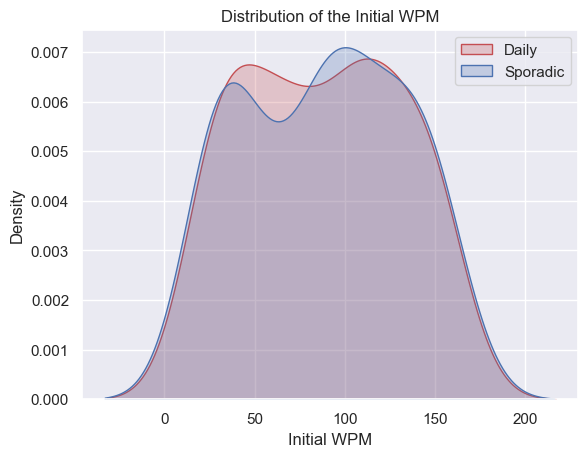

In [93]:
sns.set_theme(style="darkgrid")
sns.set_palette("pastel")
sns.kdeplot(modsimDf[modsimDf['habit'] == 'Daily']['initial_wpm'], fill=True, color="r", label = 'Daily')
sns.kdeplot(modsimDf[modsimDf['habit'] == 'Sporadic']['initial_wpm'], fill=True, color="b", label = 'Sporadic')
plt.legend()
plt.xlabel("Initial WPM")
plt.title("Distribution of the Initial WPM")
plt.show()

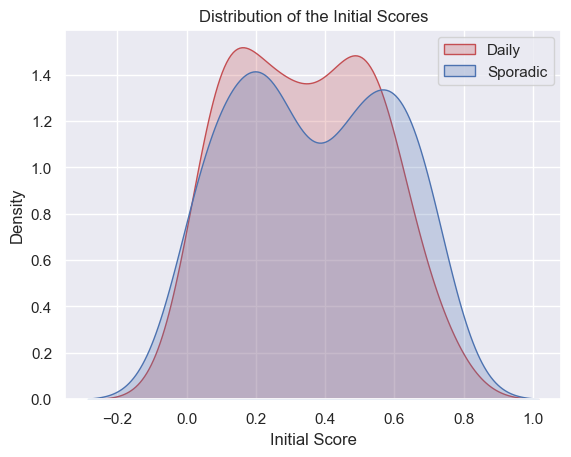

In [94]:
sns.kdeplot(modsimDf[modsimDf['habit'] == 'Daily']['initial_score'], fill=True, color="r", label = 'Daily')
sns.kdeplot(modsimDf[modsimDf['habit'] == 'Sporadic']['initial_score'], fill=True, color="b", label = 'Sporadic')
plt.legend()
plt.xlabel("Initial Score")
plt.title("Distribution of the Initial Scores")
plt.show()

# Line Chart
The following charts follow the trends of both the progression of WPM and Comprehension Scores with different appraoches (Daily and Sporadic)

In [95]:
# WPM 
speedImprovementDf

,habit,Week_0,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10
0,Daily,29.0,30.45,31.90,33.35,34.80,36.25,37.70,39.15,40.60,42.05,43.5
1,Daily,57.0,59.85,62.70,65.55,68.40,71.25,74.10,76.95,79.80,82.65,85.5
2,Daily,69.0,72.45,75.90,79.35,82.80,86.25,89.70,93.15,96.60,100.05,103.5
3,Daily,109.0,114.45,119.90,125.35,130.80,136.25,141.70,147.15,152.60,158.05,163.5
4,Daily,122.0,128.10,134.20,140.30,146.40,152.50,158.60,164.70,170.80,176.90,183.0
...,...,...,...,...,...,...,...,...,...,...,...,...
115,Sporadic,38.0,38.76,39.52,40.28,41.04,41.80,42.56,43.32,44.08,44.84,45.6
116,Sporadic,87.0,88.74,90.48,92.22,93.96,95.70,97.44,99.18,100.92,102.66,104.4
117,Sporadic,96.0,97.92,99.84,101.76,103.68,105.60,107.52,109.44,111.36,113.28,115.2
118,Sporadic,125.0,127.50,130.00,132.50,135.00,137.50,140.00,142.50,145.00,147.50,150.0


# Line Chart of Speed

In [96]:
speedImprovementDf.groupby('habit').get_group('Daily').describe()

,Week_0,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,87.183333,91.542500,95.901667,100.260833,104.620000,108.979167,113.338333,117.697500,122.056667,126.415833,130.775000
std,43.044121,45.196327,47.348533,49.500739,51.652945,53.805151,55.957357,58.109563,60.261769,62.413975,64.566181
min,25.000000,26.250000,27.500000,28.750000,30.000000,31.250000,32.500000,33.750000,35.000000,36.250000,37.500000
25%,45.750000,48.037500,50.325000,52.612500,54.900000,57.187500,59.475000,61.762500,64.050000,66.337500,68.625000
50%,86.500000,90.825000,95.150000,99.475000,103.800000,108.125000,112.450000,116.775000,121.100000,125.425000,129.750000
75%,122.000000,128.100000,134.200000,140.300000,146.400000,152.500000,158.600000,164.700000,170.800000,176.900000,183.000000
max,160.000000,168.000000,176.000000,184.000000,192.000000,200.000000,208.000000,216.000000,224.000000,232.000000,240.000000


In [97]:
speedImprovementDf.groupby('habit').get_group('Sporadic').describe()

,Week_0,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10
count,60.00000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.00000,60.000000
mean,87.90000,89.658000,91.416000,93.174000,94.932000,96.690000,98.448000,100.206000,101.964000,103.72200,105.480000
std,43.89228,44.770125,45.647971,46.525816,47.403662,48.281507,49.159353,50.037199,50.915044,51.79289,52.670735
min,25.00000,25.500000,26.000000,26.500000,27.000000,27.500000,28.000000,28.500000,29.000000,29.50000,30.000000
25%,44.00000,44.880000,45.760000,46.640000,47.520000,48.400000,49.280000,50.160000,51.040000,51.92000,52.800000
50%,91.00000,92.820000,94.640000,96.460000,98.280000,100.100000,101.920000,103.740000,105.560000,107.38000,109.200000
75%,126.00000,128.520000,131.040000,133.560000,136.080000,138.600000,141.120000,143.640000,146.160000,148.68000,151.200000
max,158.00000,161.160000,164.320000,167.480000,170.640000,173.800000,176.960000,180.120000,183.280000,186.44000,189.600000


In [98]:
dailyMeanWPM = list(speedImprovementDf.groupby('habit').get_group('Daily').describe().iloc[1, :])
dailyMeanWPM

[87.18333333333334,
 91.54250000000002,
 95.90166666666667,
 100.26083333333332,
 104.61999999999998,
 108.97916666666667,
 113.33833333333335,
 117.6975,
 122.05666666666666,
 126.41583333333331,
 130.775]

In [99]:
sporadicMeanWPM = list(speedImprovementDf.groupby('habit').get_group('Sporadic').describe().iloc[1, :])
sporadicMeanWPM

[87.9,
 89.65799999999999,
 91.416,
 93.174,
 94.93200000000002,
 96.69000000000001,
 98.44800000000002,
 100.206,
 101.96399999999998,
 103.72199999999998,
 105.48]

In [100]:
weekList = [i for i in range (11)]
weekList

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

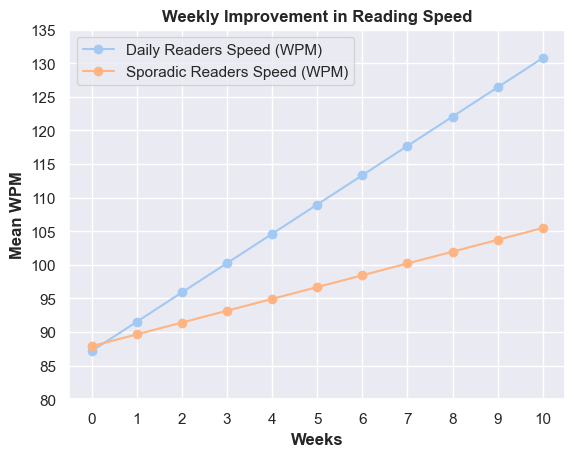

In [101]:

plt.plot(weekList, dailyMeanWPM, label="Daily Readers Speed (WPM)", marker="o")
plt.plot(weekList, sporadicMeanWPM, label="Sporadic Readers Speed (WPM)", marker="o")

# Add titles and labels
plt.title("Weekly Improvement in Reading Speed", fontsize=12, fontweight="bold")
plt.xlabel("Weeks", fontsize=12, fontweight="bold")
plt.ylabel("Mean WPM", fontsize=12, fontweight="bold")
plt.xticks(np.arange(min(weekList), max(weekList)+1, 1.0))
plt.yticks(np.arange(80, max(max(dailyMeanWPM), max(sporadicMeanWPM)) + 5,  5))
plt.legend()  # Show the legend for the two lines
plt.grid(True)  # Add a grid for better readability
plt.show()

In [102]:
data = {
    "Week": weekList * 2,  # Repeat weeks for both habits
    "Mean (WPM)": dailyMeanWPM + sporadicMeanWPM,  # Combine values into one list
    "Habit": ["Daily"] * len(weekList) + ["Sporadic"] * len(weekList)  # Label habits
}
df = pd.DataFrame(data)

# Create the plot with Seaborn
df

,Week,Mean (WPM),Habit
0,0,87.183333,Daily
1,1,91.542500,Daily
2,2,95.901667,Daily
3,3,100.260833,Daily
4,4,104.620000,Daily
5,5,108.979167,Daily
6,6,113.338333,Daily
7,7,117.697500,Daily
8,8,122.056667,Daily
9,9,126.415833,Daily


In [103]:
# sns.relplot(
#     data=df,
#     x="Week",
#     y="Mean (WPM)",
#     hue="Habit",  # Different colors for each habit
#     kind="line",
#     col="Habit",  # Separate subplots for each habit
#     marker="o"    # Add markers to lines
# )

# # Add a title for the entire plot
# plt.ylabel("Mean WPM")
# plt.suptitle("Comparison of Daily and Sporadic Habits Over Weeks", y=1.02)
# plt.show()

# Line Chart for Comprehension Score

In [104]:
comprehensionImprovementDf

,habit,Week_0,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10
0,Daily,0.20,0.2060,0.2120,0.2180,0.2240,0.2300,0.2360,0.2420,0.2480,0.2540,0.260
1,Daily,0.01,0.0103,0.0106,0.0109,0.0112,0.0115,0.0118,0.0121,0.0124,0.0127,0.013
2,Daily,0.75,0.7725,0.7950,0.8175,0.8400,0.8625,0.8850,0.9075,0.9300,0.9525,0.975
3,Daily,0.31,0.3193,0.3286,0.3379,0.3472,0.3565,0.3658,0.3751,0.3844,0.3937,0.403
4,Daily,0.09,0.0927,0.0954,0.0981,0.1008,0.1035,0.1062,0.1089,0.1116,0.1143,0.117
...,...,...,...,...,...,...,...,...,...,...,...,...
115,Sporadic,0.72,0.7272,0.7344,0.7416,0.7488,0.7560,0.7632,0.7704,0.7776,0.7848,0.792
116,Sporadic,0.51,0.5151,0.5202,0.5253,0.5304,0.5355,0.5406,0.5457,0.5508,0.5559,0.561
117,Sporadic,0.05,0.0505,0.0510,0.0515,0.0520,0.0525,0.0530,0.0535,0.0540,0.0545,0.055
118,Sporadic,0.13,0.1313,0.1326,0.1339,0.1352,0.1365,0.1378,0.1391,0.1404,0.1417,0.143


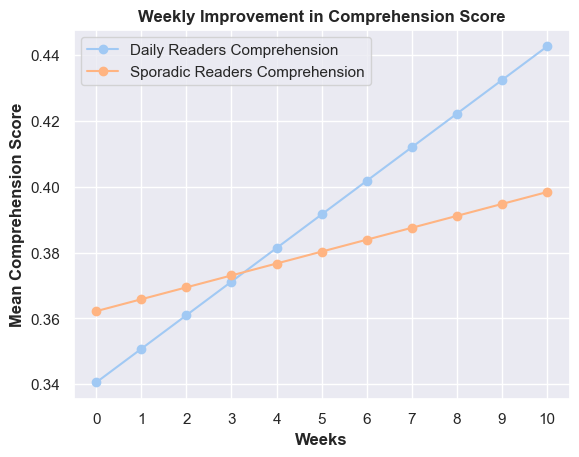

In [105]:
dailyMean = list(comprehensionImprovementDf.groupby('habit').get_group('Daily').describe().iloc[1, :])
sporadicMean = list(comprehensionImprovementDf.groupby('habit').get_group('Sporadic').describe().iloc[1, :])
weekList = [i for i in range (11)]

plt.plot(weekList, dailyMean, label="Daily Readers Comprehension", marker="o")
plt.plot(weekList, sporadicMean, label="Sporadic Readers Comprehension", marker="o")

# Add titles and labels
plt.title("Weekly Improvement in Comprehension Score", fontsize=12, fontweight="bold")
plt.xlabel("Weeks", fontsize=12, fontweight="bold")
plt.xticks(np.arange(min(weekList), max(weekList)+1, 1.0))
plt.ylabel("Mean Comprehension Score", fontsize=12, fontweight="bold")
plt.legend()  # Show the legend for the two lines
plt.grid(True)  # Add a grid for better readability
plt.show()

In [106]:
# data = {
#     "Week": weekList * 2,  # Repeat weeks for both habits
#     "Mean (Comprehension)": dailyMean + sporadicMean,  # Combine values into one list
#     "Habit": ["Daily"] * len(weekList) + ["Sporadic"] * len(weekList)  # Label habits
# }
# df = pd.DataFrame(data)

# # Create the plot with Seaborn

# sns.relplot(
#     data=df,
#     x="Week",
#     y="Mean (Comprehension)",
#     hue="Habit",  # Different colors for each habit
#     kind="line",
#     col="Habit",  # Separate subplots for each habit
#     marker="o"    # Add markers to lines
# )

# # Add a title for the entire plot
# plt.ylabel("Mean WPM")
# plt.suptitle("Comparison of Daily and Sporadic Habits Over Weeks", y=1.02)
# plt.show()

---

# Bar Chart

I need to feature engineer the reading level and erase the subcategories:

In [107]:
engineeredModsim = modsimDf.copy()
engineeredModsim

,habit,initial_wpm,initial_score,initial_reading_lvl,final_wpm,final_score,final_reading_lvl
0,Daily,29,0.20,Frustration I,43.5,0.260,Frustration II
1,Daily,57,0.01,Frustration II,85.5,0.013,Frustration III
2,Daily,69,0.75,Frustration III,103.5,0.975,Independent II
3,Daily,109,0.31,Frustration IV,163.5,0.403,Frustration VI
4,Daily,122,0.09,Frustration V,183.0,0.117,Frustration VI
...,...,...,...,...,...,...,...
115,Sporadic,38,0.72,Frustration II,45.6,0.792,Instructional II
116,Sporadic,87,0.51,Frustration III,104.4,0.561,Frustration IV
117,Sporadic,96,0.05,Frustration IV,115.2,0.055,Frustration V
118,Sporadic,125,0.13,Frustration V,150.0,0.143,Frustration VI


In [108]:
import re
myReg = re.compile(r"\b[IV]{1,3}\b") 

engineeredModsim['initial_reading_lvl'] = [myReg.sub("", i).strip() for i in modsimDf['initial_reading_lvl']]    
engineeredModsim['final_reading_lvl'] = [myReg.sub("", i).strip() for i in modsimDf['final_reading_lvl']]
engineeredModsim = engineeredModsim.rename(columns={'habit': 'Reading Habit'})

engineeredModsim

,Reading Habit,initial_wpm,initial_score,initial_reading_lvl,final_wpm,final_score,final_reading_lvl
0,Daily,29,0.20,Frustration,43.5,0.260,Frustration
1,Daily,57,0.01,Frustration,85.5,0.013,Frustration
2,Daily,69,0.75,Frustration,103.5,0.975,Independent
3,Daily,109,0.31,Frustration,163.5,0.403,Frustration
4,Daily,122,0.09,Frustration,183.0,0.117,Frustration
...,...,...,...,...,...,...,...
115,Sporadic,38,0.72,Frustration,45.6,0.792,Instructional
116,Sporadic,87,0.51,Frustration,104.4,0.561,Frustration
117,Sporadic,96,0.05,Frustration,115.2,0.055,Frustration
118,Sporadic,125,0.13,Frustration,150.0,0.143,Frustration


## Stats Descriptions of each reading level (Initial) (wpm) Daily

In [109]:
engineeredModsim[engineeredModsim['Reading Habit'] == 'Daily'].groupby('initial_reading_lvl')['initial_wpm'].agg(['std', 'mean'])

,std,mean
initial_reading_lvl,,
Frustration,43.044121,87.183333


## Stats Descriptions of each reading level (Initial) (wpm) Sporadic

In [110]:
engineeredModsim[engineeredModsim['Reading Habit'] == 'Sporadic'].groupby('initial_reading_lvl')['initial_wpm'].agg(['std', 'mean'])

,std,mean
initial_reading_lvl,,
Frustration,43.89228,87.9


## Stats Descriptions of each reading lebel (FINAL) (wpm) Daily

In [111]:
engineeredModsim[engineeredModsim['Reading Habit'] == 'Daily'].groupby('final_reading_lvl')['initial_wpm'].agg(['std', 'mean'])

,std,mean
final_reading_lvl,,
Frustration,43.017320,89.169811
Independent,34.645827,72.666667
Instructional,54.451048,71.750000


## Stats Descriptions of each reading lebel (FINAL) (wpm) Sporadic

In [112]:
engineeredModsim[engineeredModsim['Reading Habit'] == 'Sporadic'].groupby('final_reading_lvl')['initial_wpm'].agg(['std', 'mean'])

,std,mean
final_reading_lvl,,
Frustration,44.417393,88.333333
Instructional,38.527047,79.666667


### Reading Level vs Comprehension Score

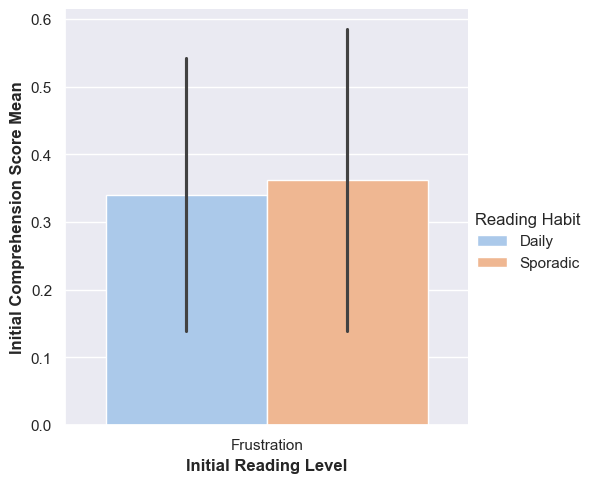

In [113]:
sns.catplot(data = engineeredModsim, x = 'initial_reading_lvl', y = 'initial_score', hue = 'Reading Habit', kind = 'bar', errorbar='sd')
plt.ylabel("Initial Comprehension Score Mean", fontsize=12, fontweight="bold")
plt.xlabel("Initial Reading Level", fontsize=12, fontweight="bold")
# plt.title("BEFORE: Initial Reading Level vs Initial Comprehension Score Mean")
plt.show()

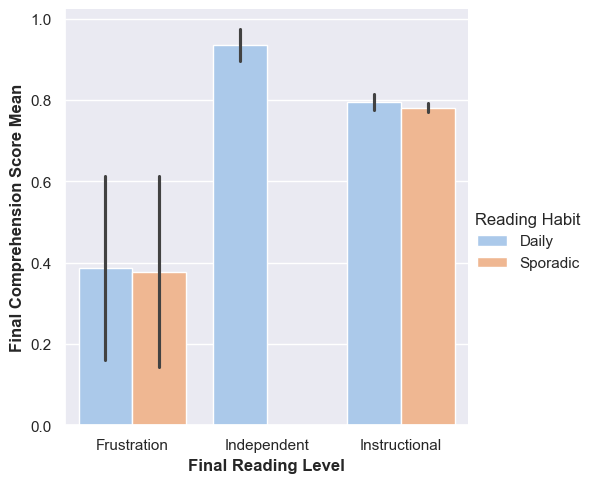

In [114]:
sns.catplot(data = engineeredModsim, x = 'final_reading_lvl', y = 'final_score', hue = 'Reading Habit', kind = 'bar', errorbar='sd')
plt.ylabel("Final Comprehension Score Mean", fontsize=12, fontweight="bold")
plt.xlabel("Final Reading Level", fontsize=12, fontweight="bold")
# plt.title("AFTER: Final Reading Level vs Final Comprehension Score Mean")
plt.show()

### Reading level vs WPM

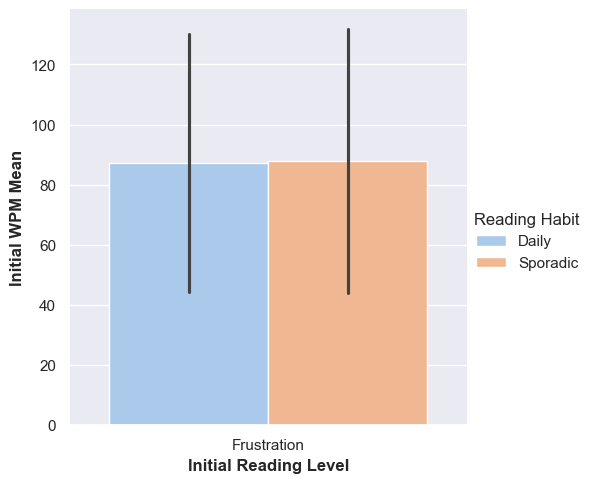

In [115]:
sns.catplot(data = engineeredModsim, x = 'initial_reading_lvl', y = 'initial_wpm', hue = 'Reading Habit', kind = 'bar', errorbar='sd')
plt.ylabel("Initial WPM Mean", fontsize=12, fontweight="bold")
plt.xlabel("Initial Reading Level", fontsize=12, fontweight="bold")
# plt.title("Before: Initial Reading Level vs Initial WPM Mean")
plt.show()

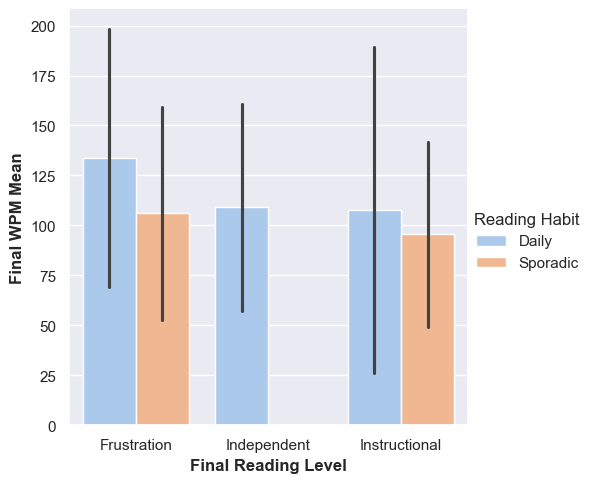

In [116]:
sns.catplot(data = engineeredModsim, x = 'final_reading_lvl', y = 'final_wpm', hue = 'Reading Habit', kind = 'bar', errorbar='sd')
plt.xlabel('Final Reading Level', fontsize=12, fontweight="bold")
plt.ylabel('Final WPM Mean', fontsize=12, fontweight="bold")

# plt.title("AFTER: Final Reading Level vs Initial WPM Mean")
plt.show()

---

# Scatter plot

In [117]:
engineeredModsim

,Reading Habit,initial_wpm,initial_score,initial_reading_lvl,final_wpm,final_score,final_reading_lvl
0,Daily,29,0.20,Frustration,43.5,0.260,Frustration
1,Daily,57,0.01,Frustration,85.5,0.013,Frustration
2,Daily,69,0.75,Frustration,103.5,0.975,Independent
3,Daily,109,0.31,Frustration,163.5,0.403,Frustration
4,Daily,122,0.09,Frustration,183.0,0.117,Frustration
...,...,...,...,...,...,...,...
115,Sporadic,38,0.72,Frustration,45.6,0.792,Instructional
116,Sporadic,87,0.51,Frustration,104.4,0.561,Frustration
117,Sporadic,96,0.05,Frustration,115.2,0.055,Frustration
118,Sporadic,125,0.13,Frustration,150.0,0.143,Frustration


Text(0.5, 1.0, 'Comprehension Score: Before and \nAfter Reading Intervention')

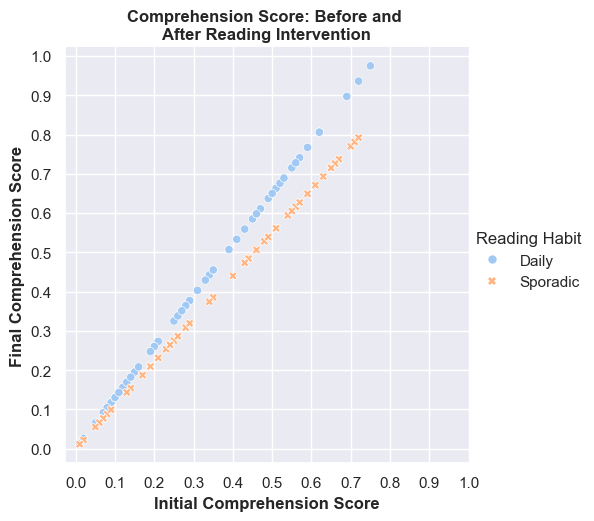

In [118]:
sns.relplot(kind = 'scatter', data = engineeredModsim, x = 'initial_score', y = 'final_score', hue = 'Reading Habit', style= 'Reading Habit')
plt.xlabel('Initial Comprehension Score', fontsize=12, fontweight="bold")
plt.ylabel('Final Comprehension Score', fontsize=12, fontweight="bold")
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.xticks(np.arange(0.0, 1.1, 0.1))
plt.title('Comprehension Score: Before and \nAfter Reading Intervention', fontsize=12, fontweight="bold")

In [119]:
# sns.relplot(kind = 'scatter', data = engineeredModsim, x = 'initial_score', y = 'final_score', hue = 'habit', col = 'habit', style = 'habit').fig.suptitle("Scatter Plot of Initial vs Final Scores by Habit", y=1.02) 

Text(0.5, 1.0, 'Reading Speed: Before and \nAfter Reading Intervention')

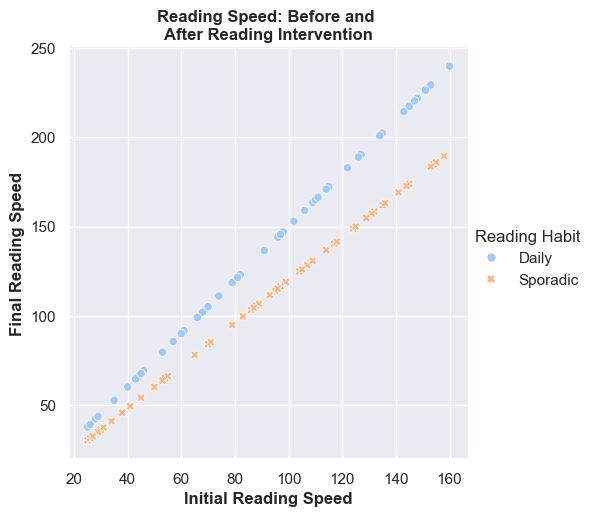

In [120]:
sns.relplot(kind = 'scatter', data = engineeredModsim, x = 'initial_wpm', y = 'final_wpm', hue = 'Reading Habit', style= 'Reading Habit')
plt.xlabel('Initial Reading Speed', fontsize=12, fontweight="bold")
plt.ylabel('Final Reading Speed', fontsize=12, fontweight="bold")
plt.title('Reading Speed: Before and \nAfter Reading Intervention', fontweight = 'bold')

In [121]:
# sns.relplot(kind = 'scatter', data = engineeredModsim, x = 'initial_wpm', y = 'final_wpm', hue = 'Reading Habit', col = 'Reading Habit', style = 'Reading Habit').fig.suptitle("Scatter Plot of Initial vs Final WPM by Habit", y=1.02) 

# Additional Graph:

In [122]:
dailyEngineered = engineeredModsim[engineeredModsim['Reading Habit'] == 'Daily']
dailyEngineered.head()

,Reading Habit,initial_wpm,initial_score,initial_reading_lvl,final_wpm,final_score,final_reading_lvl
0,Daily,29,0.20,Frustration,43.5,0.260,Frustration
1,Daily,57,0.01,Frustration,85.5,0.013,Frustration
2,Daily,69,0.75,Frustration,103.5,0.975,Independent
3,Daily,109,0.31,Frustration,163.5,0.403,Frustration
4,Daily,122,0.09,Frustration,183.0,0.117,Frustration


In [123]:
dailyEngineered.describe()

,initial_wpm,initial_score,final_wpm,final_score
count,60.000000,60.000000,60.000000,60.000000
mean,87.183333,0.340500,130.775000,0.442650
std,43.044121,0.201666,64.566181,0.262166
min,25.000000,0.010000,37.500000,0.013000
25%,45.750000,0.147500,68.625000,0.191750
50%,86.500000,0.335000,129.750000,0.435500
75%,122.000000,0.502500,183.000000,0.653250
max,160.000000,0.750000,240.000000,0.975000


In [124]:
initialCategories = dailyEngineered[['initial_reading_lvl']].copy()
initialCategories['Status'] = "Before Treatment"
initialCategories = initialCategories.rename(columns={'initial_reading_lvl': 'Student Categories'})
initialCategories.head()

,Student Categories,Status
0,Frustration,Before Treatment
1,Frustration,Before Treatment
2,Frustration,Before Treatment
3,Frustration,Before Treatment
4,Frustration,Before Treatment


## Count of Categories: (BEFORE)

In [125]:
initialCategories.groupby('Student Categories').count()

,Status
Student Categories,
Frustration,60


In [126]:
finalCategories = dailyEngineered[['final_reading_lvl']].copy()
finalCategories['Status'] = "After Treatment"
finalCategories = finalCategories.rename(columns={'final_reading_lvl': 'Student Categories'})
finalCategories.head()

,Student Categories,Status
0,Frustration,After Treatment
1,Frustration,After Treatment
2,Independent,After Treatment
3,Frustration,After Treatment
4,Frustration,After Treatment


## Count of Categories: (FINAL)

In [127]:
finalCategories.groupby('Student Categories').count()

,Status
Student Categories,
Frustration,53
Independent,3
Instructional,4


In [128]:
comparisonDf = pd.concat([initialCategories, finalCategories], axis=0)
comparisonDf = comparisonDf.reset_index(drop=True)
comparisonDf.head()

,Student Categories,Status
0,Frustration,Before Treatment
1,Frustration,Before Treatment
2,Frustration,Before Treatment
3,Frustration,Before Treatment
4,Frustration,Before Treatment


Text(56.79631250000001, 0.5, 'Number of Students')

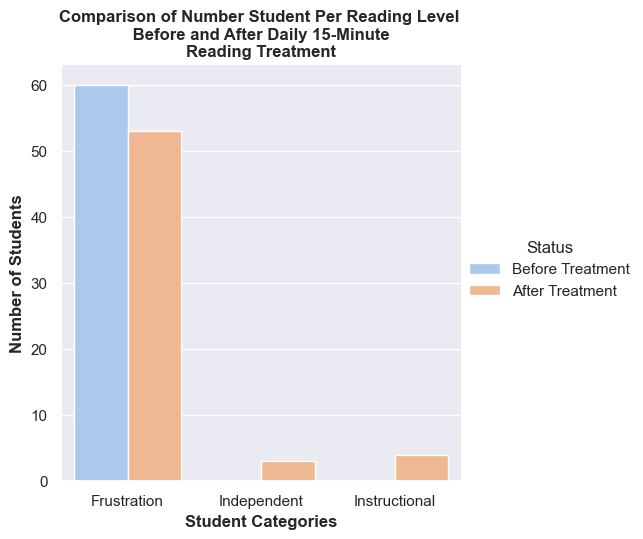

In [129]:
sns.catplot(data = comparisonDf, x = "Student Categories", hue = "Status", kind = "count")
plt.title("Comparison of Number Student Per Reading Level \n Before and After Daily 15-Minute \nReading Treatment", fontweight="bold")
plt.xlabel("Student Categories", fontsize=12, fontweight="bold")
plt.ylabel("Number of Students", fontsize=12, fontweight="bold")
plt.ylabel("Number of Students")

# Daily Table 

In [130]:
dailyCompleteDf = modsimDf[modsimDf['habit'] == 'Daily']

In [131]:
dailyCompleteDf.describe()

,initial_wpm,initial_score,final_wpm,final_score
count,60.000000,60.000000,60.000000,60.000000
mean,87.183333,0.340500,130.775000,0.442650
std,43.044121,0.201666,64.566181,0.262166
min,25.000000,0.010000,37.500000,0.013000
25%,45.750000,0.147500,68.625000,0.191750
50%,86.500000,0.335000,129.750000,0.435500
75%,122.000000,0.502500,183.000000,0.653250
max,160.000000,0.750000,240.000000,0.975000


## Initial levels Descriptive Stats (WPM)

In [132]:
modsimDf[modsimDf['habit'] == 'Daily'].groupby('initial_reading_lvl')['initial_wpm'].agg(['std', 'mean', 'count'])

,std,mean,count
initial_reading_lvl,,,
Frustration I,1.549193,27.2,10
Frustration II,8.692909,48.3,10
Frustration III,7.156194,72.9,10
Frustration IV,6.586181,102.4,10
Frustration V,8.038795,122.8,10
Frustration VI,4.790036,149.5,10


## Final levels Descriptive Stats (WPM)

In [133]:
modsimDf[modsimDf['habit'] == 'Daily'].groupby('final_reading_lvl')['final_wpm'].agg(['std', 'mean', 'count'])

,std,mean,count
final_reading_lvl,,,
Frustration II,2.371708,41.000,9
Frustration III,10.993505,76.500,8
Frustration IV,5.793315,99.375,4
Frustration V,9.427354,121.500,5
Frustration VI,30.141015,189.000,27
Independent II,NaN,103.500,1
Independent IV,NaN,163.500,1
Independent VI,NaN,60.000,1
Instructional I,NaN,217.500,1


## Initial levels Descriptive Stats (Comprehension)

In [134]:
modsimDf[modsimDf['habit'] == 'Daily'].groupby('initial_reading_lvl')['initial_score'].agg(['std', 'mean', 'count'])

,std,mean,count
initial_reading_lvl,,,
Frustration I,0.191512,0.301,10
Frustration II,0.241118,0.306,10
Frustration III,0.110700,0.521,10
Frustration IV,0.216641,0.350,10
Frustration V,0.176119,0.268,10
Frustration VI,0.185176,0.297,10


## Final levels Descriptive Stats (Comprehension)

In [135]:
modsimDf[modsimDf['habit'] == 'Daily'].groupby('final_reading_lvl')['final_score'].agg(['std', 'mean', 'count'])

,std,mean,count
final_reading_lvl,,,
Frustration II,0.214117,0.345222,9
Frustration III,0.228513,0.284375,8
Frustration IV,0.108960,0.601250,4
Frustration V,0.213295,0.556400,5
Frustration VI,0.221716,0.370259,27
Independent II,NaN,0.975000,1
Independent IV,NaN,0.936000,1
Independent VI,NaN,0.897000,1
Instructional I,NaN,0.767000,1
